In [1]:
include("prepare_data_Sioux_simp.jl");
include("extract_data.jl");
include("tap_MSA_Sioux_simp.jl");

## Solve an inverse tarffic problem over polynomials of degree at most d

## Optionally use a regularizer from the poly kernel

In [2]:
tapFlowVecDict = Dict{Int64, Array{Float64, 1}}();
tapFlowDicDict = Dict{Int64, Dict{(Int64,Int64),Float64}}();

fcoeffs = [1, 0, 0, 0, .15]
# fcoeffs = [1, .2, .5, .8, .15]

tapFlowDicDict[0], tapFlowVecDict[0] = tapMSA(demandsDict[0], fcoeffs);
tapFlowDicDict[1], tapFlowVecDict[1] = tapMSA(demandsDict[1], fcoeffs);

In [3]:
arcsDict = Dict{Int64, Dict{(Int, Int), Arc}}();

# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("../data_original/SiouxFalls_net_simp.txt", tapFlowDicDict[0]);

# get arcs data corresponding to initial demands and flows
arcsDict[1] = observFlow("../data_original/SiouxFalls_net_simp.txt", tapFlowDicDict[1]);

In [4]:
include("inverseVI.jl");

In [5]:
coeffs_dict = Dict{(Int64,Float64,Float64),Array{Float64,1}}()

deg = 6
c = 3.41
lam = 1.

est_coeffs, ys, resids = train(lam, deg, c, demandsDict[1], arcsDict[0])
coeffs_dict[(deg, c, lam)] = est_coeffs

7-element Array{Float64,1}:
  1.0       
  0.0755923 
 -0.116506  
  0.127493  
  0.0760983 
  0.0163067 
  0.00130312

### Visualize the estimated cost function

INFO: Loading help data...


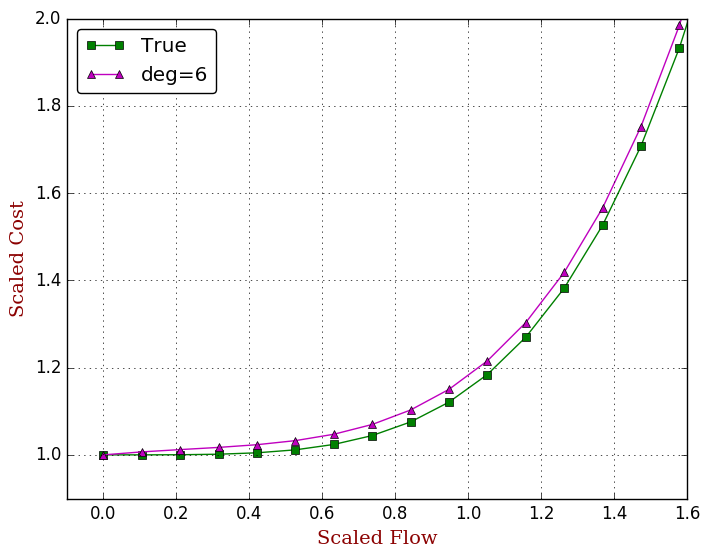

In [6]:
using PyPlot

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(6, 3.41, 1.)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

plot(xs, zs_true, "s-g", label="True")

plot(xs, zs, "^-m", label="deg=6")
legend(loc="upper left",fancybox="true") 

grid("on")
xlim(-0.1, 1.6);
ylim(0.9, 2.0);

font1 = ["family"=>"serif","color"=>"darkred","weight"=>"normal","size"=>14]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("fitting_Sioux_simp.pdf")